In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



#reading the dataset
def read_dataset():
    df = pd.read_csv("sonar.csv")
    print(len(df.columns))
    X = df[df.columns[1:60]].values
    y = df[df.columns[60]]
    #Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y, y)


#define the encoder function.
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode



# plot the data
def plot_points(features, labels):
    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10, 8))
    plt.plot(features[normal, 0], features[normal, 1], 'bx')
    plt.plot(features[outliers, 0], features[outliers, 1], 'ro')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()


#read the dataset
X, Y, y = read_dataset()
#plot the features and the labels
plot_points(X,y)



#Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)
#convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

#define the important parameters and variable to work with the tensors
learning_rate = 0.1
training_epochs = 400
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
n_class = 2

#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])


#define the model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)

    # Output layer with linear activation

    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

#define the weights and the biases for each layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

#initialize all the variables

init = tf.global_variables_initializer()

# In[11]:

#Call your model defined
y = multilayer_perceptron(x, weights, biases)
#define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

#calculate the cost and the accuracy for each epoch
mse_history = []
accuracy_history =[]

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: test_x, y_: test_y}))
    accuracy_history.append(accuracy)

    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Accuracy: ",accuracy)






61
(207, 59)


<Figure size 1000x800 with 1 Axes>

(165, 59)
(165, 2)
(42, 59)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch :  0  -  cost:  51.34506  - MSE:  2253.002097220026 - Accuracy:  0.5
epoch :  1  -  cost:  6.7133136  - MSE:  79.77431151916205 - Accuracy:  0.5
epoch :  2  -  cost:  23.354183  - MSE:  508.9733032982303 - Accuracy:  0.5
epoch :  3  -  cost:  7.3649783  - MSE:  96.13053771488909 - Accuracy:  0.5
epoch :  4  -  cost:  9.80394  - MSE:  96.76683175560476 - Accuracy:  0.5
epoch :  5  -  cost:  8.104277  - MSE:  105.7113968411579 - Accuracy:  0.5
epoch :  6  -  cost:  3.1672256  - MSE:  12.40888688329389 - Accuracy:  0.5
epoch :  7  -  cost:  7.1392794  - MSE:  91.37145535764964 - Accuracy:  0.5
epoch :  8  -  cost:  0.7864954  - MSE:  8.542862818701844 - Accuracy:  0.54761904
epoch :  9  -  cost:  

epoch :  92  -  cost:  0.41832986  - MSE:  6.239469133511813 - Accuracy:  0.7619048
epoch :  93  -  cost:  0.42196932  - MSE:  6.90049292122656 - Accuracy:  0.6666667
epoch :  94  -  cost:  0.41923925  - MSE:  6.29401860483699 - Accuracy:  0.7619048
epoch :  95  -  cost:  0.42138472  - MSE:  6.959382597063366 - Accuracy:  0.6904762
epoch :  96  -  cost:  0.4177341  - MSE:  6.358337357060569 - Accuracy:  0.7619048
epoch :  97  -  cost:  0.4181677  - MSE:  7.064865951372838 - Accuracy:  0.6904762
epoch :  98  -  cost:  0.41111898  - MSE:  6.489134180026376 - Accuracy:  0.7619048
epoch :  99  -  cost:  0.4121579  - MSE:  7.114545473568315 - Accuracy:  0.6904762
epoch :  100  -  cost:  0.4037806  - MSE:  6.543655861651866 - Accuracy:  0.7619048
epoch :  101  -  cost:  0.4053981  - MSE:  7.162138854165844 - Accuracy:  0.6904762
epoch :  102  -  cost:  0.40159515  - MSE:  6.716678995789961 - Accuracy:  0.7619048
epoch :  103  -  cost:  0.40653944  - MSE:  7.163616642023989 - Accuracy:  0.690

epoch :  189  -  cost:  0.3365413  - MSE:  8.67437884925318 - Accuracy:  0.6904762
epoch :  190  -  cost:  0.33438888  - MSE:  8.9737677779297 - Accuracy:  0.78571427
epoch :  191  -  cost:  0.33760396  - MSE:  8.891030985608479 - Accuracy:  0.6904762
epoch :  192  -  cost:  0.32583973  - MSE:  9.102933593417761 - Accuracy:  0.7619048
epoch :  193  -  cost:  0.3312168  - MSE:  8.787504245983342 - Accuracy:  0.6904762
epoch :  194  -  cost:  0.32359415  - MSE:  9.056020090559192 - Accuracy:  0.7619048
epoch :  195  -  cost:  0.32788876  - MSE:  8.978203062124438 - Accuracy:  0.6904762
epoch :  196  -  cost:  0.32207793  - MSE:  9.269952836896513 - Accuracy:  0.78571427
epoch :  197  -  cost:  0.3314908  - MSE:  8.919399586899255 - Accuracy:  0.6904762
epoch :  198  -  cost:  0.32485685  - MSE:  9.277039714916432 - Accuracy:  0.78571427
epoch :  199  -  cost:  0.33065152  - MSE:  9.133516075017363 - Accuracy:  0.6904762
epoch :  200  -  cost:  0.3250997  - MSE:  9.430832111788355 - Accur

epoch :  285  -  cost:  0.26259977  - MSE:  12.87733775424699 - Accuracy:  0.71428573
epoch :  286  -  cost:  0.26121473  - MSE:  13.76555507614607 - Accuracy:  0.78571427
epoch :  287  -  cost:  0.26149136  - MSE:  13.182055864155283 - Accuracy:  0.71428573
epoch :  288  -  cost:  0.25383398  - MSE:  14.27435570858232 - Accuracy:  0.78571427
epoch :  289  -  cost:  0.2682281  - MSE:  12.874512025226414 - Accuracy:  0.71428573
epoch :  290  -  cost:  0.25823668  - MSE:  13.730538808800041 - Accuracy:  0.78571427
epoch :  291  -  cost:  0.25484526  - MSE:  13.331097878929624 - Accuracy:  0.71428573
epoch :  292  -  cost:  0.24108556  - MSE:  14.16757537260157 - Accuracy:  0.78571427
epoch :  293  -  cost:  0.24530269  - MSE:  13.12340624441731 - Accuracy:  0.7380952
epoch :  294  -  cost:  0.23169334  - MSE:  13.837918923913767 - Accuracy:  0.78571427
epoch :  295  -  cost:  0.22774175  - MSE:  13.244299002311084 - Accuracy:  0.7380952
epoch :  296  -  cost:  0.22590114  - MSE:  14.4008

epoch :  381  -  cost:  0.17950828  - MSE:  15.5931219381275 - Accuracy:  0.7380952
epoch :  382  -  cost:  0.18184505  - MSE:  16.86065171913379 - Accuracy:  0.8095238
epoch :  383  -  cost:  0.20279388  - MSE:  15.22586554551784 - Accuracy:  0.7380952
epoch :  384  -  cost:  0.19990934  - MSE:  16.214668669574763 - Accuracy:  0.78571427
epoch :  385  -  cost:  0.19617413  - MSE:  15.416854283741781 - Accuracy:  0.7380952
epoch :  386  -  cost:  0.18294582  - MSE:  16.695882306418213 - Accuracy:  0.78571427
epoch :  387  -  cost:  0.17809305  - MSE:  15.480979539688203 - Accuracy:  0.7380952
epoch :  388  -  cost:  0.16654997  - MSE:  16.94956141149186 - Accuracy:  0.8095238
epoch :  389  -  cost:  0.1656781  - MSE:  15.916513159060944 - Accuracy:  0.7380952
epoch :  390  -  cost:  0.15977812  - MSE:  16.885435595457324 - Accuracy:  0.8095238
epoch :  391  -  cost:  0.16350198  - MSE:  15.607466120405125 - Accuracy:  0.7380952
epoch :  392  -  cost:  0.15808217  - MSE:  16.64964643404

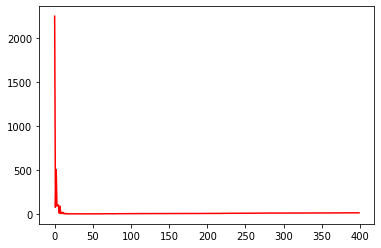

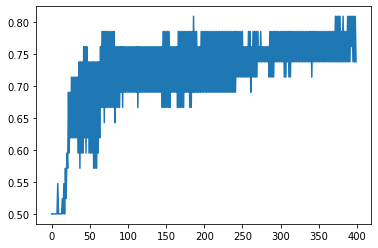

In [2]:
#plot mse and accuracy graph
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

In [3]:
#print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Accuracy:  0.7380952


In [4]:
#print the final  mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 15.6655
